# Dependencies 

In [1]:
import sys
sys.path.append('src/')

import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from mrk_file import MRKFile

%matplotlib inline

# Helper Functions

In [2]:
def load_mrk_files_from_folder(folder_path):
    mrk_filepaths = glob(os.path.join(folder_path, '*.mrk'))
    
    mrk_files = []
    for i, mrk_path in enumerate(mrk_filepaths):
        print('{} of {}'.format(i+1, len(mrk_filepaths)), end='\r')
        mrk_files.append(MRKFile(mrk_path))
    return mrk_files

# Data Loading

In [3]:
mrk_filepaths = glob(os.path.join('data/FVC/ground_truth/', '*.mrk'))

In [4]:
mrk_files_fvc = load_mrk_files_from_folder('data/FVC/ground_truth/')
print(len(mrk_files_fvc))

720 of 720


# Data Analysis

In [5]:
list_reqs = []

for mrk_file in mrk_files_fvc:
    list_reqs.append([req.is_non_compliant() for req in mrk_file.photo_reqs])
    
list_reqs = np.array(list_reqs)

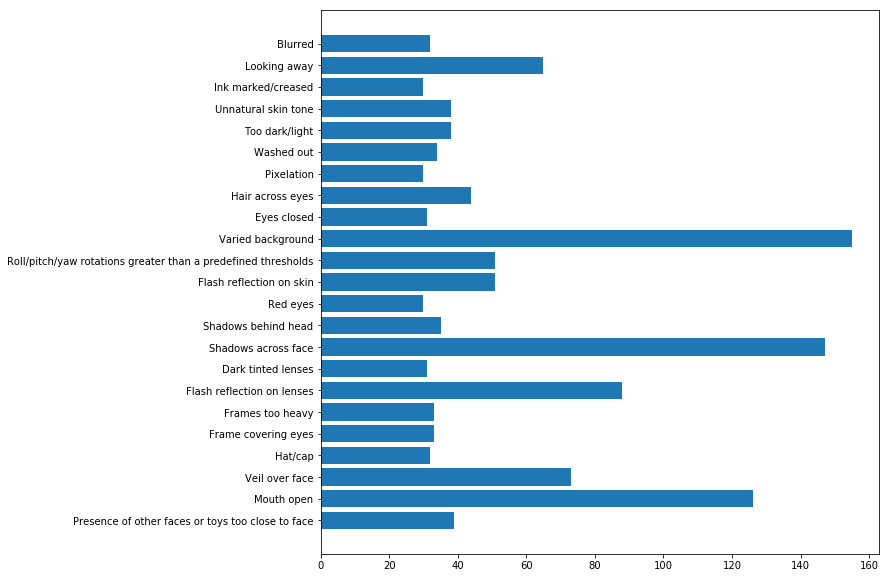

In [6]:
req_counts = list_reqs.sum(axis=0)
n_reqs = req_counts.shape[0]
req_names = [req.description for req in mrk_files_fvc[0].photo_reqs]

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.barh(range(n_reqs), req_counts)
ax.invert_yaxis()
ax.set_yticks(range(n_reqs))
ax.set_yticklabels(req_names)
plt.show()